In [47]:
!pip install scikeras

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings('ignore')

### 1) Importing Dataset

In [49]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### 2) Performing Descriptive Analysis

In [50]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3) Checking Data Type

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### 4) Checking for Null and Duplicated Values

In [52]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [53]:
df.duplicated().sum()

8

In [54]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


##### Note:- No need to drop them, but we will consider 0:11 columns

In [55]:
df1 = df.iloc[:,0:11]

In [56]:
df2 = pd.concat([df1,df['size_category']],axis=1)
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


### 5) Performing Label Encoding

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['month']= label_encoder.fit_transform(df2['month']) 
df2['day']= label_encoder.fit_transform(df2['day'])
df2['size_category']= label_encoder.fit_transform(df2['size_category'])

### 6) Data Visualization

In [58]:
df2.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


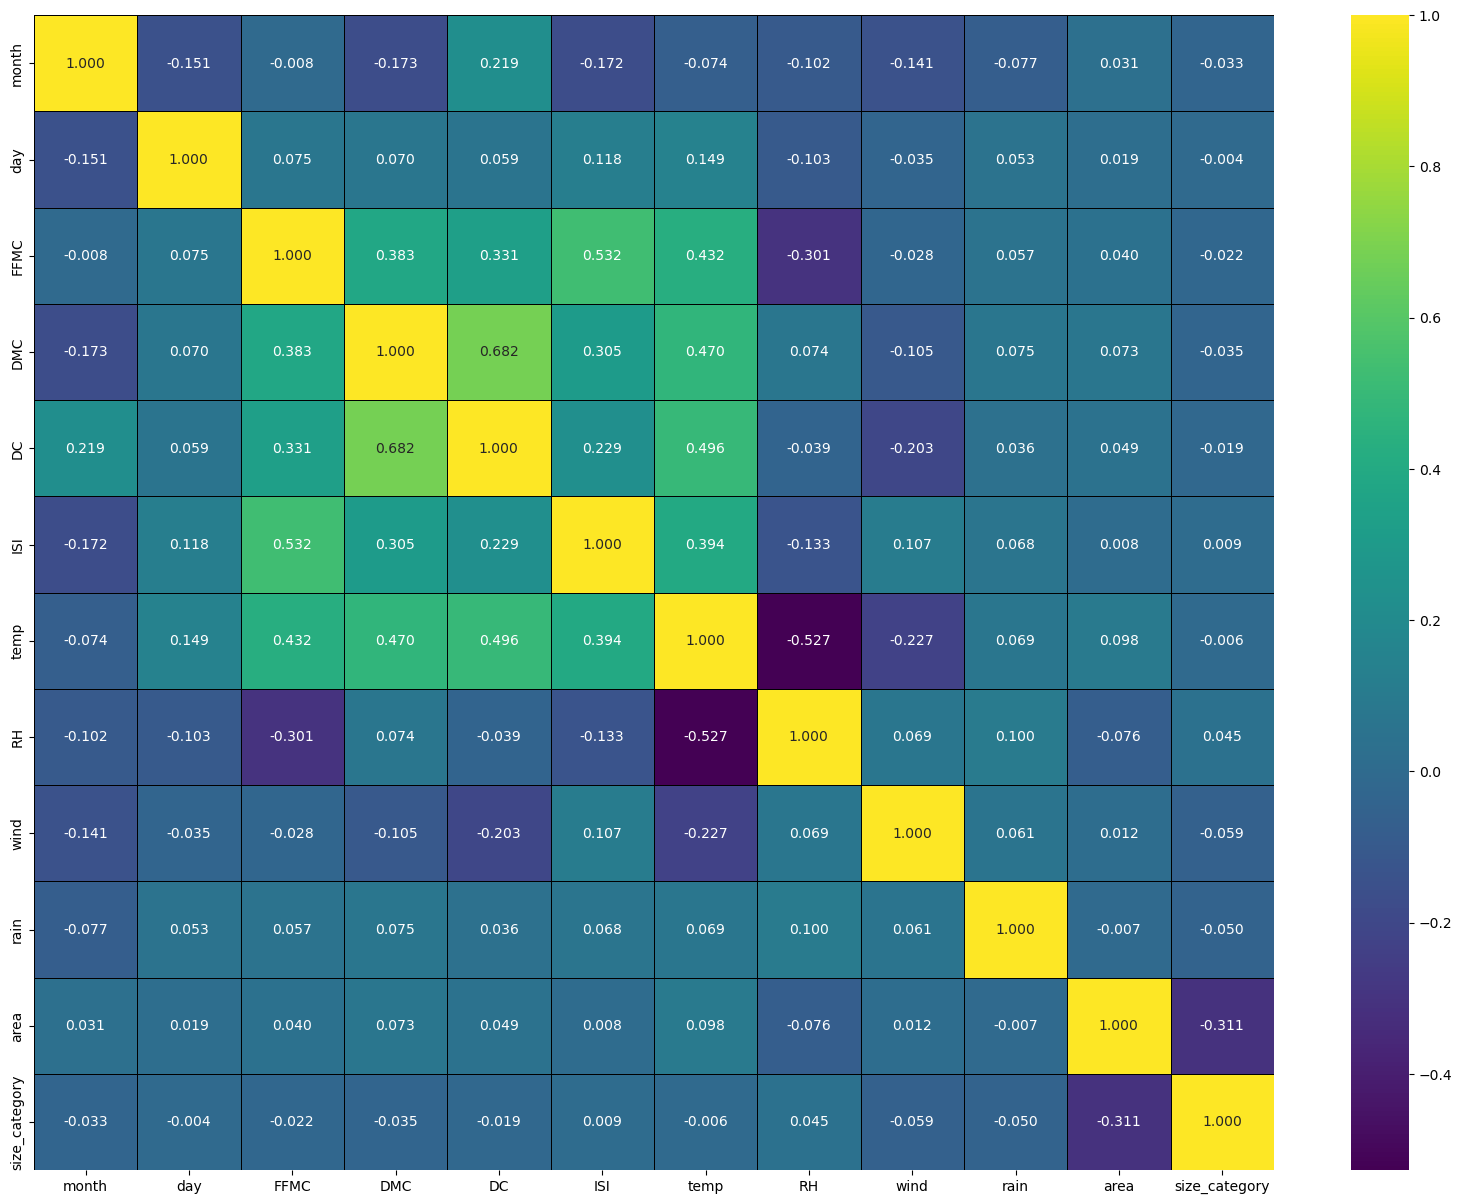

In [59]:
plt.figure(figsize = (20, 15));
sns.heatmap(df2.corr(), cmap='viridis', annot=True, fmt=".3f",linewidths=0.5, linecolor='black')
plt.show()

# `Insights`
1) DC and DMC have a positive correlation between them
2) ISI and FFMC also have a positive correlation.
3) RH and temp are negatively correlated to each other

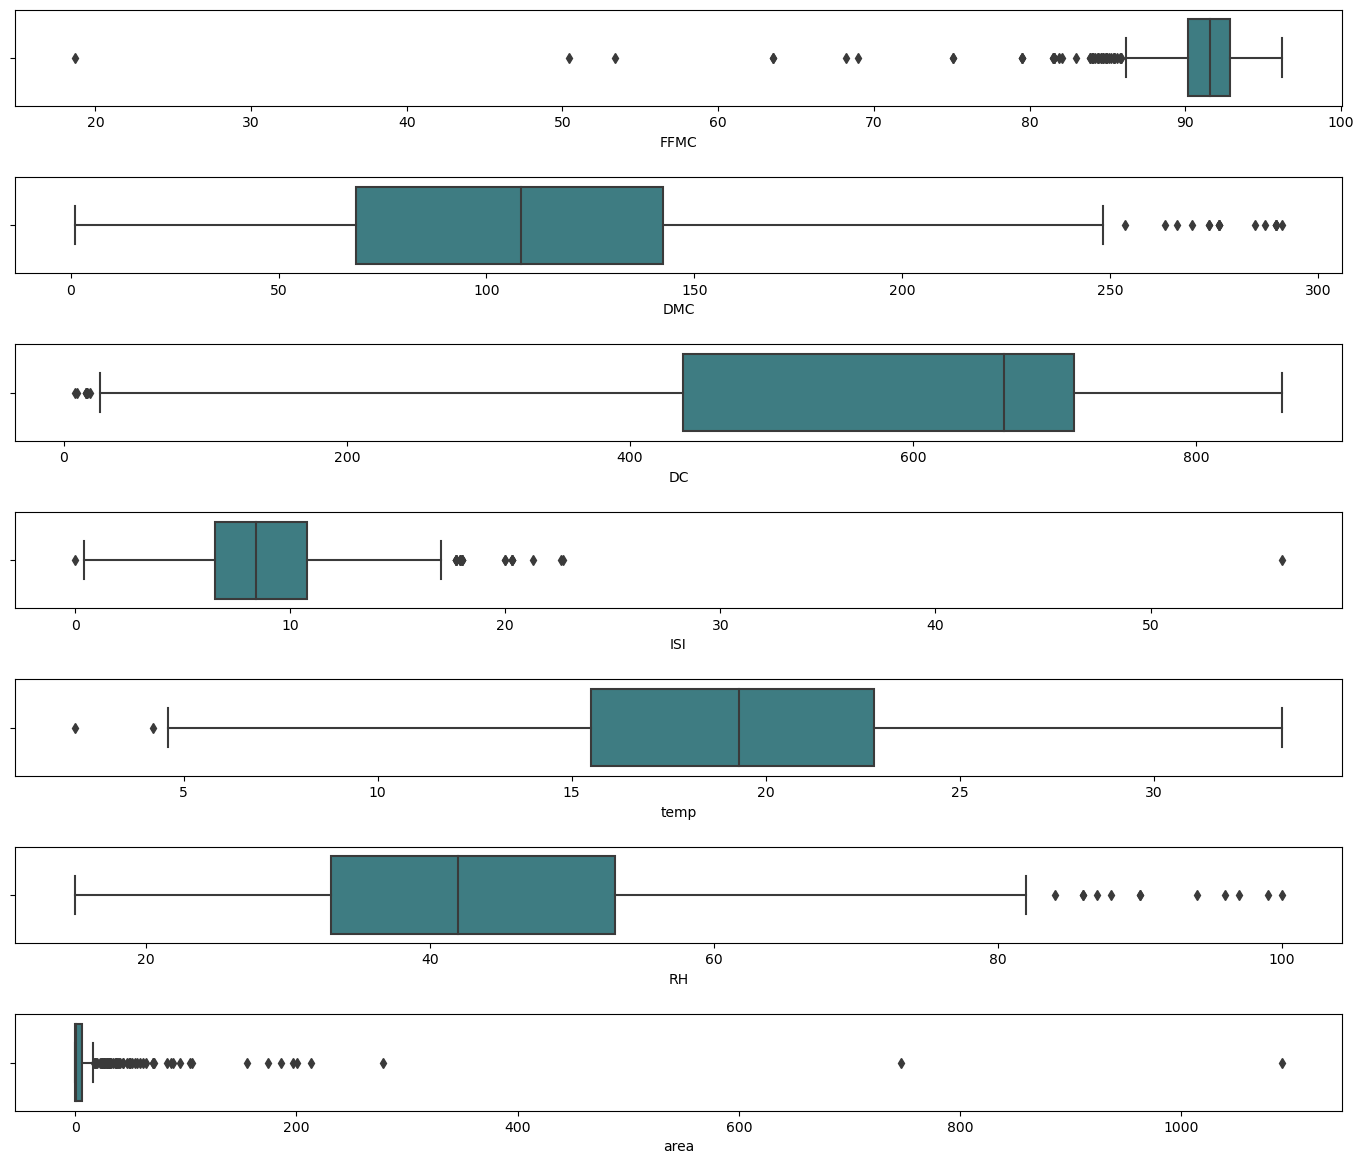

In [60]:
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

# `Insights`
There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

### 7) Neural Network

In [61]:
np.random.seed(7)
x = df2.iloc[:,0:11]
y = df2.iloc[:,-1]

In [62]:
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [63]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

#### a) Batch Size and Epochs

In [64]:
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 5ms/step - loss: 0.5968 - accuracy: 0.7572 - val_loss: 0.6986 - val_accuracy: 0.6784
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7572 - val_loss: 0.6407 - val_accuracy: 0.6784
Epoch 3/250
35/35 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7572 - val_loss: 0.6164 - val_accuracy: 0.6842
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7601 - val_loss: 0.6644 - val_accuracy: 0.6901
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7717 - val_loss: 0.5278 - val_accuracy: 0.7485
Epoch 6/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8064 - val_loss: 0.5528 - val_accuracy: 0.7427
Epoch 7/250
35/35 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8295 - val_loss: 0.3931 - val_accuracy: 0.8538
Epoch 8/250
3

Epoch 59/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9532
Epoch 60/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9884 - val_loss: 0.0754 - val_accuracy: 0.9708
Epoch 61/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9884 - val_loss: 0.0616 - val_accuracy: 0.9708
Epoch 62/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9884 - val_loss: 0.1968 - val_accuracy: 0.9415
Epoch 63/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9855 - val_loss: 0.0577 - val_accuracy: 0.9766
Epoch 64/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.1381 - val_accuracy: 0.9415
Epoch 65/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9827 - val_loss: 0.0740 - val_accuracy: 0.9708
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9971 - val_loss: 0.0671 - val_accuracy: 0.9825
Epoch 117/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0605 - val_accuracy: 0.9766
Epoch 118/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.0661 - val_accuracy: 0.9825
Epoch 119/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9884 - val_loss: 0.0675 - val_accuracy: 0.9708
Epoch 120/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9798 - val_loss: 0.0887 - val_accuracy: 0.9649
Epoch 121/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0585 - val_accuracy: 0.9766
Epoch 122/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9766
Epoch 123/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9942 - val_loss: 0.0864 - val_accuracy: 0.9591
Epoch 174/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9942 - val_loss: 0.0706 - val_accuracy: 0.9766
Epoch 175/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9708
Epoch 176/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.1405 - val_accuracy: 0.9591
Epoch 177/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.1226 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9827 - val_loss: 0.2044 - val_accuracy: 0.9298
Epoch 179/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9942 - val_loss: 0.0812 - val_accuracy: 0.9649
Epoch 180/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.0753 - val_accuracy: 0.9649
Epoch 231/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.0983 - val_accuracy: 0.9474
Epoch 232/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9971 - val_loss: 0.0718 - val_accuracy: 0.9766
Epoch 233/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9913 - val_loss: 0.0729 - val_accuracy: 0.9708
Epoch 234/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9913 - val_loss: 0.0877 - val_accuracy: 0.9532
Epoch 235/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9942 - val_loss: 0.0950 - val_accuracy: 0.9532
Epoch 236/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0989 - val_accuracy: 0.9591
Epoch 237/250

In [67]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9807
accuracy: 98.07%


In [68]:
model.metrics_names

['loss', 'accuracy']

In [69]:
scores

[0.0507812462747097, 0.9806576371192932]

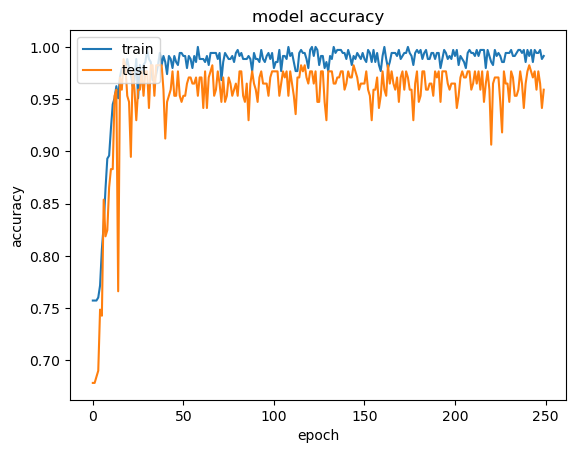

In [70]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Neural Network Hyper Parameter

In [71]:
a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

In [72]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [73]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [74]:
model =KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

#### b) Learning rate and Drop out rate

In [94]:
def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid')) 
    adam = Adam(learning_rate)
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

In [95]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

In [96]:
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

##### c) Activation Function and Kernel Initializer

In [97]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [98]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

In [99]:
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
param_grids = dict(activation_function = activation_function,init = init)

In [100]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [101]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

In [102]:
neuron1 = [4,8,16]
neuron2 = [2,4,8]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)